In [1]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 教育版, 18363, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

'2020-07-26 14:41:13'

- **@author**: run_walker
- **@references**:
    1. [python 多重继承之拓扑排序](https://kevinguo.me/2018/01/19/python-topological-sorting/)
    2. [Python 数据结构与算法——拓扑排序](https://blog.csdn.net/lanchunhui/article/details/50957608)
    3. [【Python排序搜索基本算法】之拓扑排序](https://blog.csdn.net/littlethunder/article/details/24113193)
    4. [拓扑排序在工程实践中有什么具体的应用？](https://www.zhihu.com/question/39748146)
    5. [拓扑排序及其实际应用](http://www.cnblogs.com/yanweidie/p/4438222.html)
    6. [Topological sorting](https://en.wikipedia.org/wiki/Topological_sorting)
    7. [Hamiltonian path](https://en.wikipedia.org/wiki/Hamiltonian_path)
    8. [python 生成有向无环图（DAG）--改编自CSDN](https://blog.csdn.net/LucyGill/article/details/80463090)
    9. [等价、偏序和全序](https://blog.csdn.net/lanchunhui/article/details/52220983)

# 定义

## 有向无环图
**有向无环图**(*Directed Acyclic Graph, DAG*)是一个无回路的有向图。

## 拓扑排序
**拓扑排序**(*Topological Sorting*)是指一个有向无环图的所有顶点的线性序列，且该序列必须满足下面两个条件：
1. 每个顶点出现且只出现一次。
2. 若存在一条从顶点A到顶点B的路径，那么在序列中顶点A出现在顶点B的前面。

![](imgs/topological_sorting.png)

## 哈密顿路径
**哈密顿路径**(*Hamiltonian path, traceable path*)是指一条能够对图中所有顶点正好访问一次的路径。

## 等价、偏序和全序
[等价、偏序和全序](https://blog.csdn.net/lanchunhui/article/details/52220983)

# 性质
* 一个有向图能被拓扑排序的充要条件它没有环。
* 拓扑排序并不一定唯一，只有当图的所有顶点间具有全序关系时，拓扑排序的结果才唯一，形成一条哈密顿路径。

# 应用
* 软件安装、包管理
* 代码编译、类的多重继承
* 一些现实问题，例如游戏中做任务的先后顺序、大学修课程的先后顺序
* 后馈神经网络梯度的更新顺序

# 小工具

## 检验

In [3]:
def check(edges, order_list):
    """
    :param edges: [(u1, v1), ...]
    :param order_list:
    """
    order_dict = dict(zip(order_list, range(len(order_list))))
    for u, v in edges:
        if order_dict[u] > order_dict[v]:
            print("error", u, v)
            break
    else:
        print("correct topological order")

## 生成DAG
假设要生成含有N个节点的网络。首先随机生成一个$1$到$N$的排列。这个排列就是DAG的拓扑序，然后每次随机从前往后连边，这样就可以保证生成的是一个DAG了。

In [4]:
import random


def gen_dag_edges(n, m):
    """
    :param n: n个节点
    :param m: m条边 
    :return:
    """ 
    edges = set()
    nodes = list(range(n))
    random.shuffle(nodes)
    for _ in range(m):
        u = random.randint(0, n - 2)
        v = random.randint(u + 1, n - 1)
        edges.add((nodes[u], nodes[v]))
    return list(edges), nodes

In [5]:
edges, order_list = gen_dag_edges(13, 15)
edges
order_list

[(12, 2),
 (8, 3),
 (10, 5),
 (6, 11),
 (9, 2),
 (5, 12),
 (8, 0),
 (2, 1),
 (0, 11),
 (11, 1),
 (4, 12),
 (3, 6),
 (4, 2),
 (4, 11)]

[8, 10, 7, 3, 6, 9, 5, 0, 4, 11, 12, 2, 1]

In [6]:
check(edges, order_list)

correct topological order


## 可视化

<div class="alert alert-block alert-info">
    <i class="fa fa-list-alt" aria-hidden="true"><b> Todo:</b></i>
    <ul>
        <li>使用其他工具包，使得布局更优美清晰。</li>
        <li>以动画的形式展示。</li>
    </ul>
</div>

In [68]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def visulize(edges, order_list, ncols=4):
    n = len(order_list) + 1
    nrows = math.ceil(n / ncols)
    _, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 5))
    plt.axis("off")
    g = nx.DiGraph(edges)
    layout = nx.layout.circular_layout(g)
    for i, ax in enumerate(axes.flat):
        if i < n:
            color_map = ["red" if x in order_list[i:] else "green" for x in g.nodes]
            nx.draw(g, layout, node_color=color_map, with_labels=True, ax=ax)
        ax.set_frame_on(False)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    
    

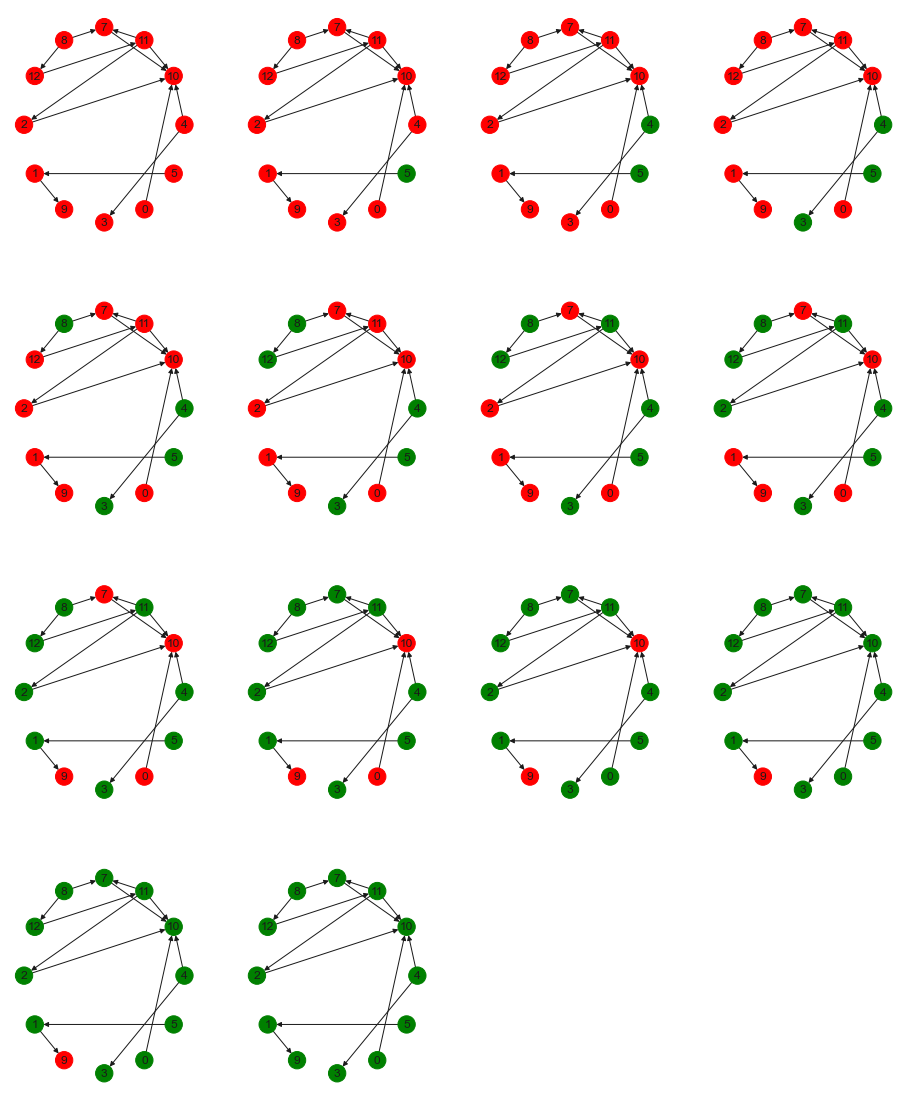

In [69]:
visulize(edges, order_list)

# 算法

## 基于BFS
**Kahn算法**。从**入度**的角度考虑，每次将入度为0的点插到现有排序之后，相似地可以从**出度**的角度考虑，每次将出度为0的点插到现有排序之前。

### 算法流程
维基百科上的伪代码如下：
```
L ← Empty list that will contain the sorted elements
S ← Set of all nodes with no incoming edge
while S is non-empty do
    remove a node n from S
    add n to tail of L
    for each node m with an edge e from n to m do
        remove edge e from the graph
        if m has no other incoming edges then
            insert m into S
if graph has edges then
    return error   (graph has at least one cycle)
else 
    return L   (a topologically sorted order)
```

### 复杂度分析
遍历所有边建立node_edges和in_degree的时间复杂度为$O(|E|)$，遍历in_degree查找入度为0的点的时间复杂度为$O(|V|)$，接下来，所有点一一进入S，又从S中推出的时间复杂度为$O(|V|)$，推出每个点时遍历从它出发的所有边的时间复杂度为$O(|E|)$，综上，Kahn算法的时间复杂度为$O(|V|+|E|)$。

### python实现

#### 自己实现

In [6]:
from collections import defaultdict

def topological_sort_kahn(edges):
    """
    :param edges: [(u1, v1), ...]
    :return: 
    """
    node_edges = defaultdict(set)
    in_degree = {}
    for u, v in edges:
        node_edges[u].add(v)
        in_degree.setdefault(u, 0)
        in_degree[v] = in_degree.get(v, 0) + 1
    S = {v for v, d in in_degree.items() if d == 0}  # 入度为0的点
    L = []
    #
    while S:
        n = S.pop()
        in_degree.pop(n)
        L.append(n)
        for m in node_edges[n]:
            in_degree[m] -= 1
            if in_degree[m] == 0:
                S.add(m)
    #
    if in_degree:
        raise Exception("exists cycle: {}".format(list(in_degree.keys())))
        # return "exists cycle: {}".format(list(in_degree.keys()))
    return L

![](imgs/demo1.png)

In [7]:
edges = [(0, 1), (0, 5), (0, 6), (2, 0), (2, 3), (3, 5), (5, 4), (6, 4), (6, 9), (7, 6), (8, 7), (9, 10), (9, 11), (9, 12), (11, 12)]
order_list = topological_sort_kahn(edges)
order_list
check(edges, order_list)

# 当图中所有点间不具有全序时，拓扑排序是不唯一的
another_order_list = [2, 8, 0, 3, 7, 1, 5, 6, 9, 4, 11, 10, 12]
check(edges, another_order_list)

[8, 2, 3, 7, 0, 1, 5, 6, 4, 9, 10, 11, 12]

correct topological order
correct topological order


In [71]:
# 有环时不存在拓扑排序
try:
    topological_sort_kahn([(0, 1), (1, 0)])
except Exception as e:
    print(e)

exists cycle: [0, 1]


#### 通过Graph模块

In [9]:
import networkx as nx

def topological_sort_kahn_graph(edges):
    """
    :param edges: [(u1, v1), ...]
    :return:
    """
    g = nx.DiGraph(edges)
    S = {v for v, d in g.in_degree if d == 0}
    L = []
    #
    while S:
        n = S.pop()
        L.append(n)
        temp = g[n].keys()
        g.remove_node(n)
        for m in temp:
            if g.in_degree(m) == 0:
                S.add(m)
    if g.edges():
        raise Exception("exists cycle:", g.edges())
    return L

In [10]:
edges = [(0, 1), (0, 5), (0, 6), (2, 0), (2, 3), (3, 5), (5, 4), (6, 4), (6, 9), (7, 6), (8, 7), (9, 10), (9, 11), (9, 12), (11, 12)]
order_list = topological_sort_kahn_graph(edges)
order_list
check(edges, order_list)

[8, 2, 3, 7, 0, 1, 5, 6, 4, 9, 10, 11, 12]

correct topological order


In [70]:
# 有环时不存在拓扑排序
try:
    topological_sort_kahn_graph([(0, 1), (1, 0)])
except Exception as e:
    print(e)

('exists cycle:', OutEdgeView([(0, 1), (1, 0)]))


## 基于DFS

### 算法流程
维基百科上的伪代码如下：

```
L ← Empty list that will contain the sorted nodes
while there are unmarked nodes do
    select an unmarked node n
    visit(n) 

function visit(node n)
    if n has a permanent mark then return
    if n has a temporary mark then stop   (not a DAG)
    mark n temporarily
    for each node m with an edge from n to m do
        visit(m)
    mark n permanently
    add n to head of L
```

### 有效性证明
考虑任意一条边v->w，当调用dfs(v)的时候，有如下三种情况：
1. dfs(w)还没有被调用，即w还没有被mark，此时会调用dfs(w)，然后当dfs(w)返回之后，dfs(v)才会返回
2. dfs(w)已经被调用并返回了，即w已经被mark
3. dfs(w)已经被调用但是在此时调用dfs(v)的时候还未返回

对于前两种情况，无论是情况1还是情况2，w都会先于v被添加到结果列表中。而第三种情况在拓扑排序的场景下是不可能发生的，假设存在情况3，则存在一条由w指向v的路径。而现在我们的前提条件是由v到w有一条边，这就导致我们的图中存在环路，从而该图就不是一个有向无环图(DAG)，而我们已经知道，非有向无环图是不能被拓扑排序的。

### 复杂度分析
同Kahn算法一样，时间复杂度同样为$O(|V|+|E|)$。

### python实现

#### 自己实现

##### 法一（推荐）

In [7]:
from collections import defaultdict

def topological_sort_dfs(edges):
    """
    :param edges: [(u1, v1), ...]
    :return:
    """
    nodes = set()
    node_edges = defaultdict(set)
    for u, v in edges:
        nodes.update({u, v})
        node_edges[u].add(v)
    #
    tem = set()  # 当前正在搜索（但是已经搜索完毕的点并不推出）
    per = set()  # 已经搜索完毕
    L = []
    #
    def _dfs(u):
        if u in per: return  # 是否位于per的判断要先于tem
        if u in tem:
            raise Exception(f"exists cycle, contains: {tem - per}")
        tem.add(u)
        for v in node_edges[u]:
            _dfs(v)
        per.add(u)
        L.append(u)
    #
    for node in nodes:
        _dfs(node)
    return L[::-1]

In [8]:
edges = [(0, 1), (0, 5), (0, 6), (2, 0), (2, 3), (3, 5), (5, 4), (6, 4), (6, 9), (7, 6), (8, 7), (9, 10), (9, 11), (9, 12), (11, 12)]
order_list = topological_sort_dfs(edges)
order_list
check(edges, order_list)

[8, 7, 2, 3, 0, 6, 9, 11, 12, 10, 5, 4, 1]

correct topological order


In [9]:
# 有环时不存在拓扑排序
try:
    topological_sort_dfs([(0, 1), (1, 0)])
except Exception as e:
    print(e)

exists cycle, contains: {0, 1}


##### 法二（unused）

<div class="alert alert-block alert-warning">
    <i class="fa fa-sticky-note" aria-hidden="true"><b> Note:</b></i>
    改变了标记的方式，不再用集合，而是用三个不同的数来表示不同的状态。但是没什么意义，并不能降低时间或空间复杂度。
</div>

In [15]:
from collections import defaultdict

def topological_sort_dfs_method2(edges):
    node_edges = defaultdict(set)
    nodes = set()
    for u, v in edges:
        node_edges[u].add(v)
        nodes.update({u, v})
    #
    flag = dict.fromkeys(nodes, 0)
    L = []
    #
    def _dfs(u):
        if flag[u] == 1:  # 是否位于per的判断要先于tem，因为tem中是不推出数据的
            return 
        if flag[u] == -1:
            raise Exception("exists cycle, contains: {0}".format({k for k, v0 in flag.items() if v0 == -1}))
        flag[u] = -1
        for v in node_edges[u]:
            _dfs(v)
        flag[u] = 1
        L.append(u)
    #
    for n in nodes:
        _dfs(n)
    return L[::-1]

In [16]:
edges = [(0, 1), (0, 5), (0, 6), (2, 0), (2, 3), (3, 5), (5, 4), (6, 4), (6, 9), (7, 6), (8, 7), (9, 10), (9, 11), (9, 12), (11, 12)]
order_list = topological_sort_dfs_method2(edges)
order_list
check(edges, order_list)

[8, 7, 2, 3, 0, 6, 9, 11, 12, 10, 5, 4, 1]

correct topological order


In [73]:
# 有环时不存在拓扑排序
try:
    topological_sort_dfs_method2([(0, 1), (1, 0)])
except Exception as e:
    print(e)

exists cycle, contains: {0, 1}


#### 通过Graph模块
networkx模块中给出了采用循环和递归的两种不同实现。

In [18]:
??nx.topological_sort

Signature: nx.topological_sort(G)
Source:   
def topological_sort(G):
    """Returns a generator of nodes in topologically sorted order.

    A topological sort is a nonunique permutation of the nodes such that an
    edge from u to v implies that u appears before v in the topological sort
    order.

    Parameters
    ----------
    G : NetworkX digraph
        A directed acyclic graph (DAG)

    Returns
    -------
    iterable
        An iterable of node names in topological sorted order.

    Raises
    ------
    NetworkXError
        Topological sort is defined for directed graphs only. If the graph `G`
        is undirected, a :exc:`NetworkXError` is raised.

    NetworkXUnfeasible
        If `G` is not a directed acyclic graph (DAG) no topological sort exists
        and a :exc:`NetworkXUnfeasible` exception is raised.  This can also be
        raised if `G` is changed while the returned iterator is being processed

    RuntimeError
        If `G` is changed while the returned

In [19]:
def topological_sort_dfs_graph(edges):
    g = nx.DiGraph(edges)
    return list(nx.topological_sort(g))

In [20]:
edges = [(0, 1), (0, 5), (0, 6), (2, 0), (2, 3), (3, 5), (5, 4), (6, 4), (6, 9), (7, 6), (8, 7), (9, 10), (9, 11), (9, 12), (11, 12)]
check(edges, topological_sort_dfs_graph(edges))

correct topological order


In [74]:
# 有环时不存在拓扑排序
try:
    topological_sort_dfs_graph([(0, 1), (1, 0)])
except Exception as e:
    print(e)

Graph contains a cycle or graph changed during iteration


## [Parallel algorithms](https://en.wikipedia.org/wiki/Topological_sorting#Parallel_algorithms)

<div class="alert alert-block alert-info">
    <i class="fa fa-list-alt" aria-hidden="true"><b> Todo:</b></i>
    论文已下载，待研究。
</div>

## 效率对比
networkx模块实例化graph对象耗时较久，直接编写的效率均高过使用该模块的。

In [22]:
edges, _ = gen_dag_edges(20000, 400000)
len(edges)

398488

In [23]:
%timeit topological_sort_kahn(edges)  # 和1st效率相近

436 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit topological_sort_kahn_graph(edges)

1.86 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit topological_sort_dfs(edges)  # 1st

370 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit topological_sort_dfs_method2(edges)  # 和1st效率相近

384 ms ± 7.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit topological_sort_dfs_graph(edges)

1.25 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
check(edges, topological_sort_kahn(edges))
check(edges, topological_sort_kahn_graph(edges))
check(edges, topological_sort_dfs(edges))
check(edges, topological_sort_dfs_method2(edges))
check(edges, topological_sort_dfs_graph(edges))

correct topological order
correct topological order
correct topological order
correct topological order
correct topological order


# 例题
[【LeetCode】拓扑排序 topological-sort（共5题）](https://www.cnblogs.com/zhangwanying/p/9964691.html)

## [207. 课程表](https://leetcode-cn.com/problems/course-schedule/)
共有$n$门课需要选，记为$0$到$n-1$。在选修某些课程之前需要一些先修课程，例如，想要学习课程$0$，需要先完成课程$1$，我们用$[0,~1]$来表示这种先后顺序关系。给定课程总量以及它们的先决条件，判断是否可能完成所有课程的学习？注：假定输入的先决条件中没有重复的边。

## [210. 课程表 II](https://leetcode-cn.com/problems/course-schedule-ii/description/)
共有$n$门课需要选，记为$0$到$n−1$。在选修某些课程之前需要一些先修课程，例如，想要学习课程$0$，需要先完成课程$1$，我们用$[0,~1]$来表示这种先后顺序关系。给定课程总量以及它们的先决条件，返回所有课程的学习顺序，如无法学习所有课程则返回空数组。注：假定输入的先决条件中没有重复的边。

该题目和207的做法没有任何差别。